## Sale-Analysis ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
dataframe = pd.read_excel('saleA.xlsx')
dataframe.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [3]:
dataframe.tail()

,Date,Time,State,Group,Unit,Sales
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500
7559,2020-12-30,Evening,TAS,Seniors,13,32500


### DATA-WRANGLING

In [4]:
dataframe.isna().sum(axis=0)

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

*There is no null value in the data*


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Select the features to be scaled
features_to_scale = ['Unit', 'Sales']

# Extract the selected features from the dataset
data_to_scale = dataframe[features_to_scale]

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale)

# Merge the scaled data with the original dataset
merged_data = pd.concat([dataframe.drop(features_to_scale, axis=1), scaled_df], axis=1)
print(merged_data)

           Date        Time State     Group      Unit     Sales
0    2020-10-01     Morning    WA      Kids  0.095238  0.095238
1    2020-10-01     Morning    WA       Men  0.095238  0.095238
2    2020-10-01     Morning    WA     Women  0.031746  0.031746
3    2020-10-01     Morning    WA   Seniors  0.206349  0.206349
4    2020-10-01   Afternoon    WA      Kids  0.015873  0.015873
...         ...         ...   ...       ...       ...       ...
7555 2020-12-30   Afternoon   TAS   Seniors  0.190476  0.190476
7556 2020-12-30     Evening   TAS      Kids  0.206349  0.206349
7557 2020-12-30     Evening   TAS       Men  0.206349  0.206349
7558 2020-12-30     Evening   TAS     Women  0.142857  0.142857
7559 2020-12-30     Evening   TAS   Seniors  0.174603  0.174603

[7560 rows x 6 columns]


In [6]:
grouped_data = merged_data.groupby('Group')

total_spent1 = grouped_data['Sales'].sum()

print(total_spent1)

Group
 Kids       480.142857
 Men        484.444444
 Seniors    473.571429
 Women      482.492063
Name: Sales, dtype: float64


### Men sales is the highest, and Seniors sales is the lowest

In [7]:
grouped_data = merged_data.groupby('State')

total_spent2 = grouped_data['Sales'].sum()

print(total_spent2)

State
 NSW    441.714286
 NT     109.079365
 QLD    177.888889
 SA     339.412698
 TAS    110.222222
 VIC    635.968254
 WA     106.365079
Name: Sales, dtype: float64


In [8]:
grouped_data = merged_data.groupby('Time').sum()
print(grouped_data)

                  Unit       Sales
Time                              
 Afternoon  643.857143  643.857143
 Evening    631.666667  631.666667
 Morning    645.126984  645.126984


### VIC State with higest sale and WA with lowest sale


## DATA-ANALYSIS

In [9]:
merged_data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


In [10]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# set the Date column as the index
merged_data.set_index('Date', inplace=True)

# generate weekly sales report
weekly_sales = merged_data['Sales'].resample('W').sum()
weekly_report = pd.DataFrame({'Sales': weekly_sales})

# generate monthly sales report
monthly_sales = merged_data['Sales'].resample('M').sum()
monthly_report = pd.DataFrame({'Sales': monthly_sales})

# generate quarterly sales report
quarterly_sales = merged_data['Sales'].resample('Q').sum()
quarterly_report = pd.DataFrame({'Sales': quarterly_sales})

# print the reports
print("Weekly Sales Report:\n", weekly_report)
print("\nMonthly Sales Report:\n", monthly_report)
print("\nQuarterly Sales Report:\n", quarterly_report)

Weekly Sales Report:
                  Sales
Date                  
2020-10-04   84.857143
2020-10-11  152.777778
2020-10-18  150.476190
2020-10-25  151.587302
2020-11-01  122.460317
2020-11-08  113.809524
2020-11-15  115.761905
2020-11-22  115.380952
2020-11-29  117.698413
2020-12-06  169.412698
2020-12-13  181.492063
2020-12-20  182.317460
2020-12-27  183.047619
2021-01-03   79.571429

Monthly Sales Report:
                  Sales
Date                  
2020-10-31  645.650794
2020-11-30  495.761905
2020-12-31  779.238095

Quarterly Sales Report:
                   Sales
Date                   
2020-12-31  1920.650794


In [11]:
reshaped_df = merged_data.pivot_table(index='Group', columns='State',values='Sales')
reshaped_df

State,NSW,NT,QLD,SA,TAS,VIC,WA
Group,,,,,,,
Kids,0.405350,0.102293,0.168372,0.309583,0.104056,0.588125,0.100529
Men,0.415579,0.103762,0.165608,0.312875,0.103645,0.589242,0.103527
Seniors,0.395944,0.096767,0.160847,0.314345,0.101117,0.587066,0.097884
Women,0.419106,0.101176,0.164021,0.320282,0.099412,0.591005,0.092005


In [12]:
reshaped_df.columns

Index([' NSW', ' NT', ' QLD', ' SA', ' TAS', ' VIC', ' WA'], dtype='object', name='State')

### Data-Visualization

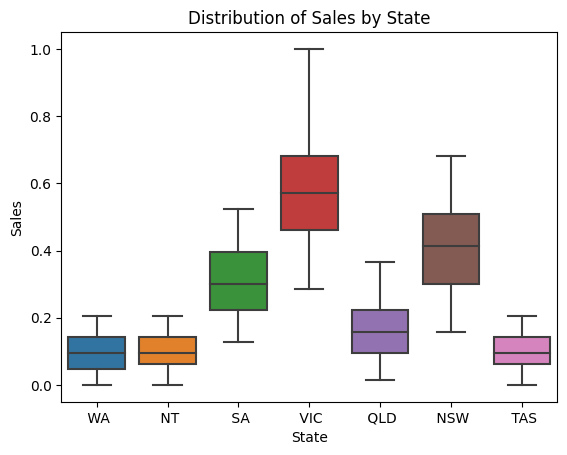

In [13]:
sns.boxplot(x='State', y='Sales', data=merged_data)

# Add labels and a title
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Distribution of Sales by State')
plt.show()

## VIC State with highest sales followed by the sales NSW,SA and QLD and lowest sales can be seen in WA, NT,TAS.

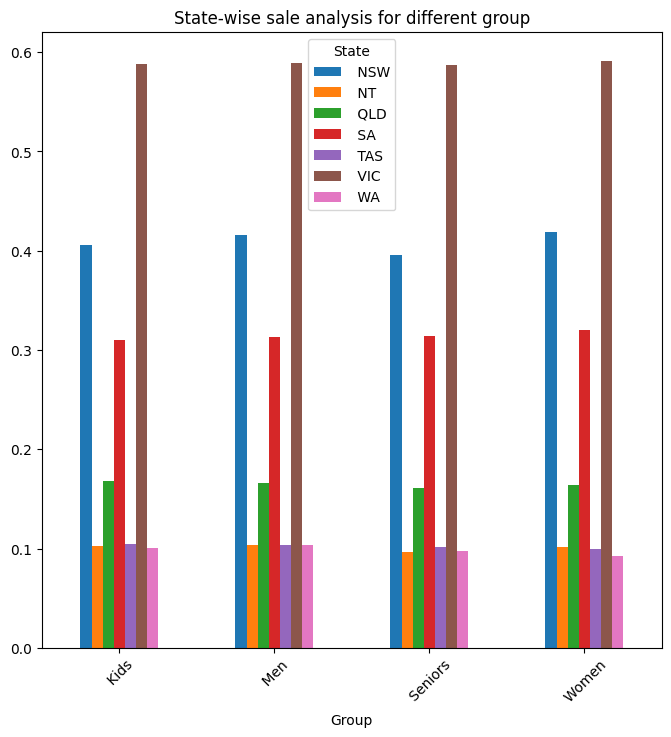

In [14]:
#State-wise sale analysis for different group
reshaped_df.plot(kind="bar", figsize=(8,8), stacked=False)
plt.xticks(fontsize=10, rotation=45)
plt.title("State-wise sale analysis for different group")
plt.show()

### State-wise sales for kids, Men, Seniors and Women.VIC State with highest sales in Kids, Men, Seniors and Women Category,followed by NSW in Kids, Men, Seniors and Women Category ,then in SA Kids, Men, Seniors and Women Category and QLD in Kids, Men, Seniors and Women Category and lowest sales can be seen in states WA, NT,TAS for  Kids, Men, Seniors and Women Category.

In [15]:
reshaped_df = merged_data.pivot_table(index='State', columns='Group',values='Sales')
reshaped_df

Group,Kids,Men,Seniors,Women
State,,,,
NSW,0.405350,0.415579,0.395944,0.419106
NT,0.102293,0.103762,0.096767,0.101176
QLD,0.168372,0.165608,0.160847,0.164021
SA,0.309583,0.312875,0.314345,0.320282
TAS,0.104056,0.103645,0.101117,0.099412
VIC,0.588125,0.589242,0.587066,0.591005
WA,0.100529,0.103527,0.097884,0.092005


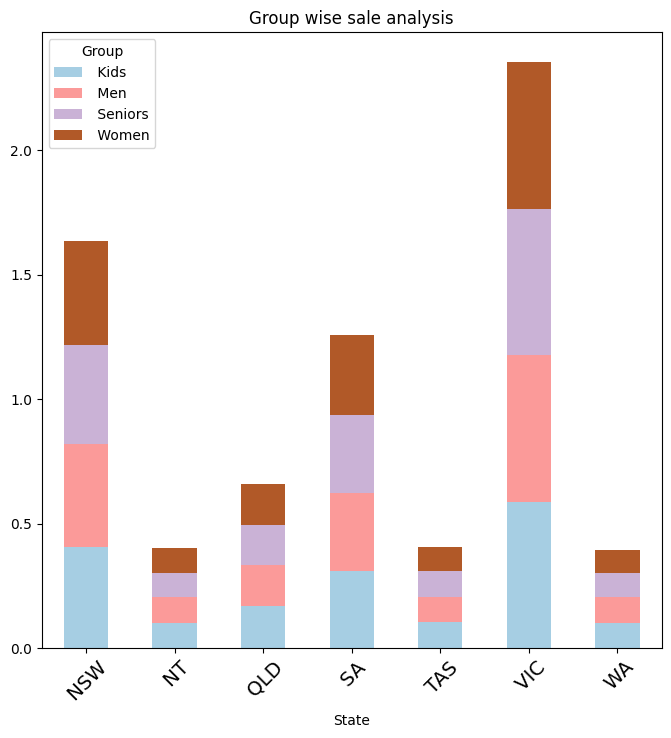

In [16]:
#Group wise sale analysis
reshaped_df.plot(kind="bar", figsize=(8,8), stacked=True, colormap='Paired')
plt.xticks(fontsize=14, rotation=45)
plt.title('Group wise sale analysis')
plt.show()

In [17]:
#Time of the day analysis
grouped_data = merged_data.groupby('Time')
T_S = grouped_data['Sales'].sum()
T_S

Time
 Afternoon    643.857143
 Evening      631.666667
 Morning      645.126984
Name: Sales, dtype: float64

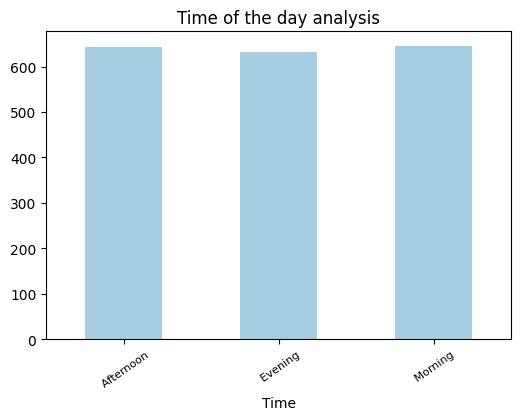

In [18]:
T_S.plot(kind="bar", figsize=(6,4), colormap='Paired')
plt.xticks(fontsize=8, rotation=35)
plt.title('Time of the day analysis') 
plt.show()

*Afternoon and Morning sales are slightly higher than evening sales*

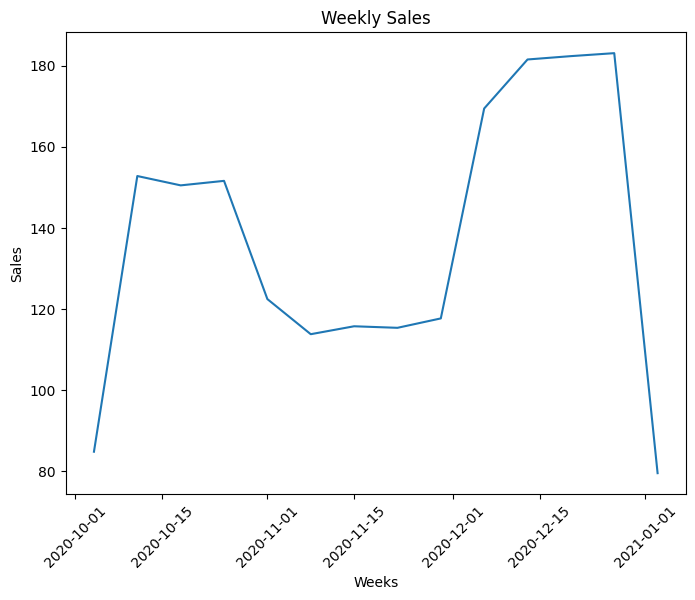

In [19]:
fig = plt.figure(figsize=(8, 6))
sns.lineplot(x=weekly_report.index,y= 'Sales', data=weekly_report)
plt.title('Weekly Sales')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.xticks(fontsize=10, rotation=45)
plt.show()



Based on the weekly sales data, it can be inferred that sales were strong during October, moderate during November, and significantly higher during December.






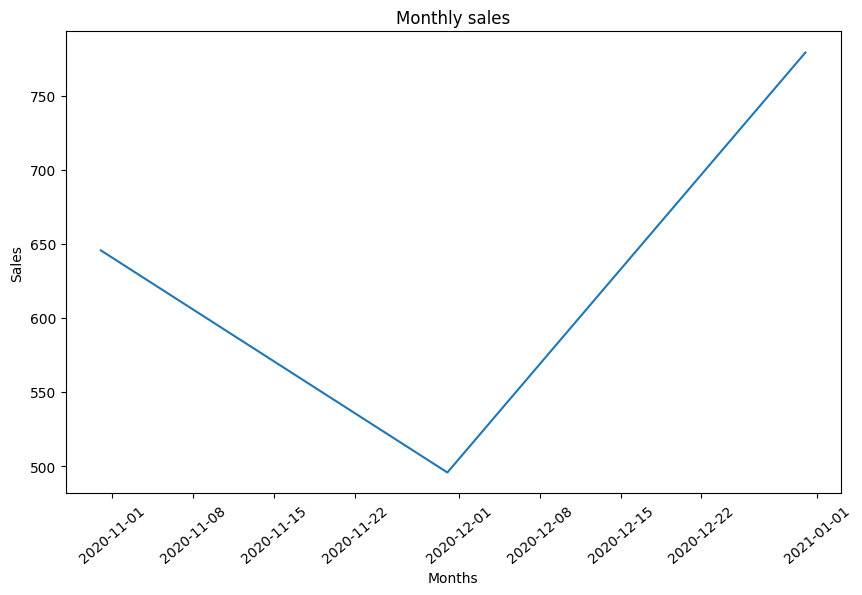

In [22]:
fig = plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_report.index, y='Sales', data=monthly_report)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly sales')
plt.xticks(fontsize=10, rotation=40)
plt.show()


Based on the analysis of monthly sales data, it can be concluded that sales were initially robust, followed by a decline, and subsequently experienced a significant resurgence.

